In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
import os 

In [3]:
class SPDReNNLS:
    def __init__(self, spd_data):
        self.data = spd_data
        self.wavelengths = np.arange(360, 831)
        self.mu = np.array([415, 445, 480, 515, 555, 590, 630, 680])
        self.sigma = np.array([11.0403, 12.7388, 15.2866, 16.5605, 16.5605, 16.9851, 21.2314, 22.0807])

    def Reconstructed_spectrum(self):
        self.filters = np.zeros((len(self.mu), len(self.wavelengths)))
        for i in range(8):
            self.filters[i] = np.exp(-0.5 * ((self.wavelengths - self.mu[i]) / self.sigma[i])**2)
        self.M = self.filters.T
        self.a_hat = np.zeros((self.M.shape[1], self.data.shape[1]))
        for i in range(self.data.shape[1]):
            # NNLS
            self.a_hat[:, i], rnorm = nnls(self.M, self.data[:, i])
        self.reconstructed_spectrum = np.dot(self.M, self.a_hat)
        
    
    def Evaluate(self, Light, save_path=None):
        s = self.data[:, Light]
        s_re = self.reconstructed_spectrum[:, Light]
        MAE = np.mean(np.absolute(s - s_re))
        RMSE = np.sqrt(np.mean(np.square(s - s_re)))
        RRMSE = RMSE / np.mean(s_re)

        # GFC
        num = abs(np.sum(s * s_re))
        denom_s = np.sqrt(np.sum(s ** 2) + 1e-9)
        denom_s_re = np.sqrt(np.sum(s_re ** 2) + 1e-9)
        GFC = num / (denom_s * denom_s_re)

        print("MAE: ", MAE)
        print("RMSE: ", RMSE)
        print("RRMES: ", RRMSE)
        print("GFC: ", GFC)

        if save_path:
            with open(save_path, 'a') as f:
                f.write(f"Light: {Light + 1}\n")
                f.write(f"MAE: {MAE}\n")
                f.write(f"RMSE: {RMSE}\n")
                f.write(f"RRMES: {RRMSE}\n")
                f.write(f"GFC: {GFC}\n\n")
            print(f"Results saved to {save_path}")

    def Plot(self, Light, save_path=None):
        # 创建一个包含三个子图的图像
        fig, axs = plt.subplots(3, 1)
        s = self.data[:, Light]
        r = self.reconstructed_spectrum[:, Light]

        # 绘制真实光谱图
        axs[0].plot(self.wavelengths, s, label='True Spectrum')
        axs[0].set_xlabel('Wavelength (nm)')
        axs[0].set_ylabel('Intensity')
        axs[0].set_title('True Spectrum vs Reconstructed Spectrum')
        axs[0].legend()

        # 绘制重建光谱图
        axs[1].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[1].set_xlabel('Wavelength (nm)')
        axs[1].set_ylabel('Intensity')
        axs[1].legend()

        # 绘制重建光谱和真实光谱叠加的图
        axs[2].plot(self.wavelengths, s, label='True Spectrum')
        axs[2].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[2].set_xlabel('Wavelength (nm)')
        axs[2].set_ylabel('Intensity')
        axs[2].legend()

        if save_path:
            file_name = f"Light_s{Light + 1}.png"
            plt.savefig(os.path.join(save_path, file_name))

        plt.tight_layout()
        plt.show()

In [4]:
spd = np.load("/Users/dongtianchi/Documents/GIT/SpectralReconstruction/ComputationalSpectrometers/MachineLearning/cleandata.npy", allow_pickle= True)

In [5]:
r = SPDReNNLS(spd)
r.Reconstructed_spectrum()

In [7]:
with open('output_NNLS/results.txt', 'w') as f:
    f.write('')

Light_list = [0,3,300,1000,1493] 

for i in Light_list:
    r.Evaluate(i, "output_NNLS/results.txt")

MAE:  0.00047297382594542367
RMSE:  0.0007658736197683627
RRMES:  0.12647612331244706
GFC:  0.9977873549594876
Results saved to output_NNLS/results.txt
MAE:  0.0025619299016602605
RMSE:  0.005764197199568354
RRMES:  0.8048301275982834
GFC:  0.9202125574517116
Results saved to output_NNLS/results.txt
MAE:  0.0008571938720902878
RMSE:  0.0012771201514375286
RRMES:  0.1951477703842781
GFC:  0.9910636898983797
Results saved to output_NNLS/results.txt
MAE:  0.0008051074698687734
RMSE:  0.0012347028972186204
RRMES:  0.1706914493363629
GFC:  0.9916637859163546
Results saved to output_NNLS/results.txt
MAE:  0.0036057651695552387
RMSE:  0.00804891554350563
RRMES:  0.8298527746413954
GFC:  0.892637453649516
Results saved to output_NNLS/results.txt


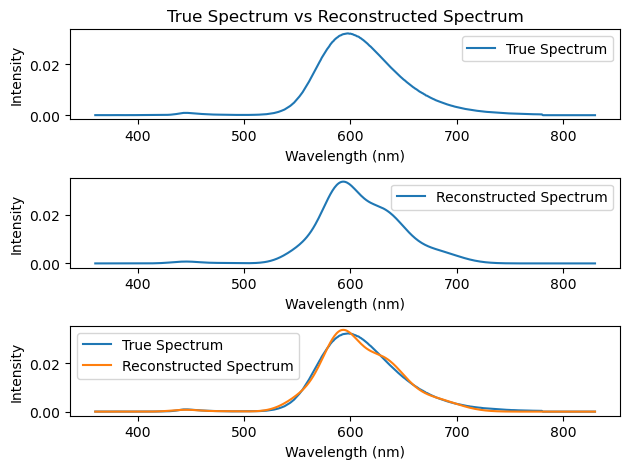

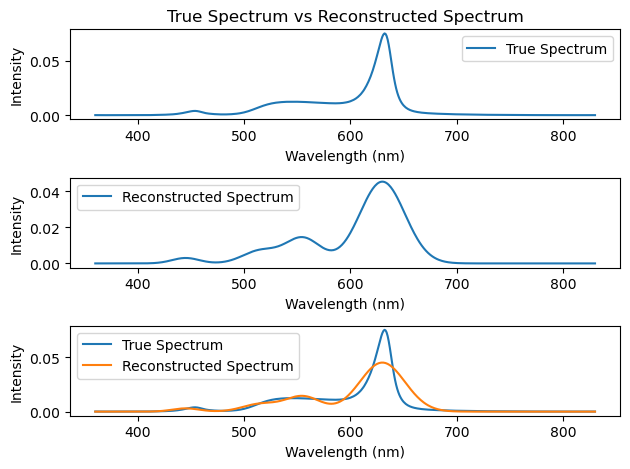

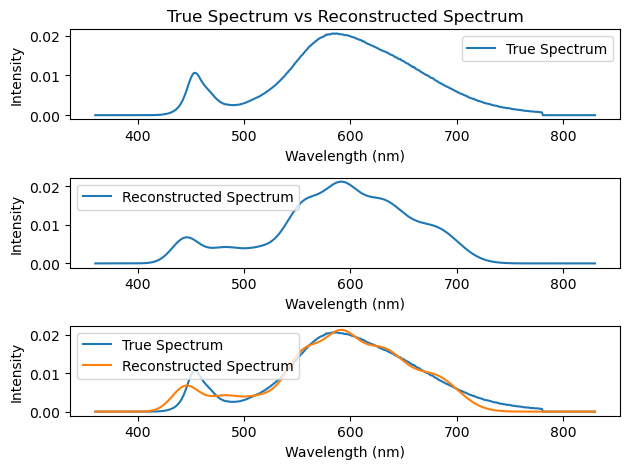

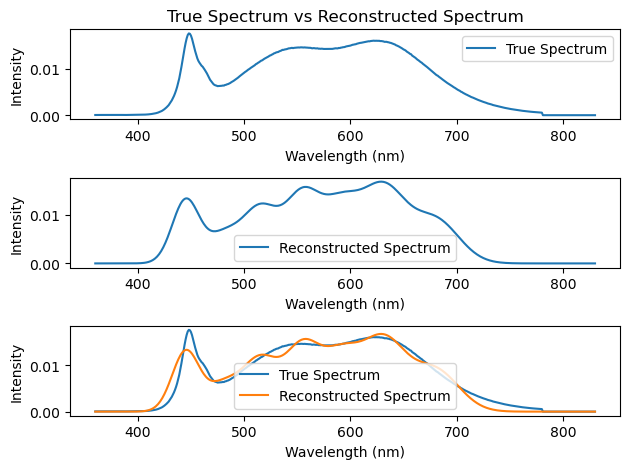

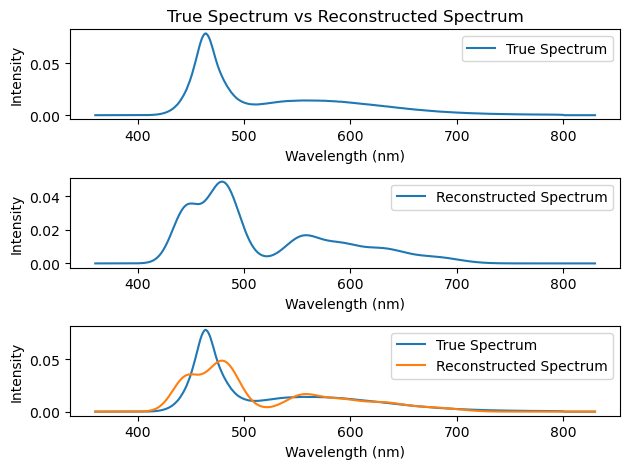

In [9]:
for i in Light_list:
    r.Plot(i, "output_NNLS")

In [1]:
def Evaluate(data, re_data, save_path=None, name = None):
        MAE_list = []
        RMSE_list = []
        GFC_list = []

        
        for i in range(1494):
            s = data[:, i]
            s_re = re_data[:, i]
            MAE = np.mean(np.absolute(s - s_re))
            RMSE = np.sqrt(np.mean(np.square(s - s_re)))
            RRMSE = RMSE / np.mean(s_re)

            # GFC
            num = abs(np.sum(s * s_re))
            denom_s = np.sqrt(np.sum(s ** 2) + 1e-9)
            denom_s_re = np.sqrt(np.sum(s_re ** 2) + 1e-9)
            GFC = num / (denom_s * denom_s_re)

            MAE_list.append(MAE)
            RMSE_list.append(RMSE)
            GFC_list.append(GFC)

        MAE_result = np.mean(MAE_list)
        RMSE_result = np.mean(RMSE_list)
        GFC_result = np.mean(GFC_list)


        if save_path:
            with open(save_path, 'a') as f:
                f.write(f"TOTlE: {name}\n")
                f.write(f"MAE_TOTLE: {MAE_result}\n")
                f.write(f"RMSE_TOTLE: {RMSE_result}\n")
                f.write(f"GFC_TOTLE: {GFC_result}\n\n")
            print(f"Results saved to {save_path}")

        return MAE_result, RMSE_result, GFC_result


x = r.reconstructed_spectrum

PCA_MAE, PCA_RMSE, PCA_GFC = Evaluate(spd, x,"output_NNLS/results_totle_NNLS.txt")

In [6]:
x = r.reconstructed_spectrum

In [7]:
x.shape

(471, 1494)

In [9]:
PCA_MAE, PCA_RMSE, PCA_GFC = Evaluate(spd, x,"output_NNLS/results_totle_NNLS.txt")

Results saved to output_NNLS/results_totle_NNLS.txt
